# **LAB 4 - PART 1 Classification with KNN, Decision Tree and Random Forest**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
pd.options.display.float_format = '{:.3f}'.format

#### **Read csv file**
Select only `['Total.Cup.Points', 'Species','Country.of.Origin','Processing.Method', 'Aroma', 'Flavor', 'Aftertaste','Acidity','Body', 'Balance', 'Uniformity', 'Moisture', 'altitude_mean_meters']`

In [ ]:
### START CODE HERE ###
df = pd.read_csv("/content/Coffee-modified.csv")
### END CODE HERE ###


In [ ]:
selected_columns = ['Total.Cup.Points', 'Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Moisture', 'altitude_mean_meters']

# Assuming 'df' is the DataFrame you've read from the file
df = df[selected_columns]

df


,Total.Cup.Points,Species,Country.of.Origin,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
0,90.580,Arabica,Ethiopia,Washed / Wet,8.670,8.830,8.670,8.750,8.500,8.420,10.000,0.120,2075.000
1,89.920,Arabica,Ethiopia,Washed / Wet,8.750,8.670,8.500,8.580,8.420,8.420,10.000,0.120,2075.000
2,89.750,Arabica,Guatemala,NaN,8.420,8.500,8.420,8.420,8.330,8.420,10.000,0.000,1700.000
3,89.000,Arabica,Ethiopia,Natural / Dry,8.170,8.580,8.420,8.420,8.500,8.250,10.000,0.110,2000.000
4,88.830,Arabica,Ethiopia,Washed / Wet,8.250,8.500,8.250,8.500,8.420,8.330,10.000,0.120,2075.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,68.330,Arabica,Mexico,Washed / Wet,7.080,6.830,6.250,7.420,7.250,6.750,10.000,0.110,900.000
1307,67.920,Arabica,Haiti,Natural / Dry,6.750,6.580,6.420,6.670,7.080,6.670,9.330,0.140,350.000
1308,63.080,Arabica,Nicaragua,Other,7.250,6.580,6.330,6.250,6.420,6.080,6.000,0.130,1100.000
1309,59.830,Arabica,Guatemala,Washed / Wet,7.500,6.670,6.670,7.670,7.330,6.670,8.000,0.100,1417.320


**Drop NA**


In [ ]:
df = df.dropna()

In [ ]:
### START CODE HERE ###

### END CODE HERE ###
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1309
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Total.Cup.Points      1003 non-null   float64
 1   Species               1003 non-null   object 
 2   Country.of.Origin     1003 non-null   object 
 3   Processing.Method     1003 non-null   object 
 4   Aroma                 1003 non-null   float64
 5   Flavor                1003 non-null   float64
 6   Aftertaste            1003 non-null   float64
 7   Acidity               1003 non-null   float64
 8   Body                  1003 non-null   float64
 9   Balance               1003 non-null   float64
 10  Uniformity            1003 non-null   float64
 11  Moisture              1003 non-null   float64
 12  altitude_mean_meters  1003 non-null   float64
dtypes: float64(10), object(3)
memory usage: 109.7+ KB


,Total.Cup.Points,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
count,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000
mean,82.127,7.567,7.514,7.386,7.526,7.504,7.499,9.870,0.095,1816.792
std,2.632,0.301,0.324,0.333,0.308,0.273,0.341,0.445,0.043,9112.473
min,59.830,5.080,6.170,6.170,5.250,6.330,6.080,6.000,0.000,1.000
25%,81.170,7.420,7.330,7.170,7.330,7.330,7.330,10.000,0.100,1100.000
50%,82.420,7.580,7.500,7.420,7.500,7.500,7.500,10.000,0.110,1310.640
75%,83.580,7.750,7.670,7.580,7.670,7.670,7.670,10.000,0.120,1600.000
max,90.580,8.750,8.830,8.670,8.750,8.500,8.580,10.000,0.170,190164.000


In [ ]:
df.describe()

,Total.Cup.Points,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
count,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000
mean,82.127,7.567,7.514,7.386,7.526,7.504,7.499,9.870,0.095,1816.792
std,2.632,0.301,0.324,0.333,0.308,0.273,0.341,0.445,0.043,9112.473
min,59.830,5.080,6.170,6.170,5.250,6.330,6.080,6.000,0.000,1.000
25%,81.170,7.420,7.330,7.170,7.330,7.330,7.330,10.000,0.100,1100.000
50%,82.420,7.580,7.500,7.420,7.500,7.500,7.500,10.000,0.110,1310.640
75%,83.580,7.750,7.670,7.580,7.670,7.670,7.670,10.000,0.120,1600.000
max,90.580,8.750,8.830,8.670,8.750,8.500,8.580,10.000,0.170,190164.000


Let's `Y` be  `Total.Cup.Points` and X be the rest except in  `Y`.

In [ ]:
### START CODE HERE ###
Y = df.drop(columns=['Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Moisture', 'altitude_mean_meters'])
X = df.drop(columns=['Total.Cup.Points'])
### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- X : `['Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor','Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Moisture','altitude_mean_meters']`
- Y : `['Total.Cup.Points']`

</details>

In [ ]:
print("X : ",X.columns.tolist())
print("Y : ",Y.columns.tolist())

X :  ['Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Moisture', 'altitude_mean_meters']
Y :  ['Total.Cup.Points']


**Labeling Bean_grade value using percentile**

- Bean_grade = 1 ; `if Y < rating_pctile[0] 75 percentile`
- Bean_grade = 2 ; `if rating_pctile[0] <= Y < rating_pctile[1] 90 percentile`
- Bean_grade = 3 ; `if Y >= rating_pctile[1]`

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>
<br>

|       |   Bean_grade |
|-------|--------------|
| count | 1003.000000  |
| mean  | 1.360917     |
| std   | 0.663677     |
| min   | 1.000000     |
| 25%   | 1.000000     |
| 50%   | 1.000000     |
| 75%   | 2.000000     |
| max   | 3.000000     |

</details>

In [ ]:
### START CODE HERE ###

# Calculate percentiles
rating_pctiles = np.percentile(Y, [75, 90])

# Define function to label Bean_grade
def label_bean_grade(score):
    if score < rating_pctiles[0]:
        return 1
    elif score < rating_pctiles[1]:
        return 2
    else:
        return 3


Y["Bean_grade"] = Y['Total.Cup.Points'].apply(label_bean_grade)
Y.drop(columns = "Total.Cup.Points",inplace=True)
### END CODE HERE ###


In [ ]:
Y.describe()

,Bean_grade
count,1003.000
mean,1.361
std,0.664
min,1.000
25%,1.000
50%,1.000
75%,2.000
max,3.000


In [ ]:
Y

,Bean_grade
0,3
1,3
3,3
4,3
9,3
...,...
1305,1
1306,1
1307,1
1308,1


**Plot Bar graph that show count of each `Bean_grade`.**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

![image-2.png](attachment:image-2.png)

</details>

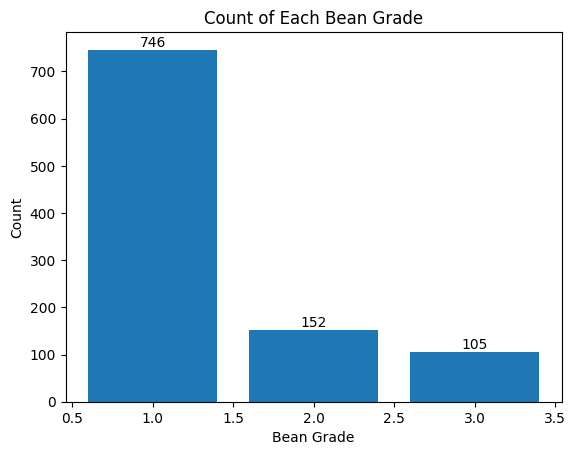

In [ ]:
### START CODE HERE ###

# Count the occurrences of each Bean_grade
bean_grade_counts = Y.value_counts()
# Plotting the bar graph
plt.bar([1,2,3], bean_grade_counts.values)

# # Adding labels and title
plt.xlabel('Bean Grade')
plt.ylabel('Count')
plt.title('Count of Each Bean Grade')

# # Adding annotations
for i, count in enumerate(bean_grade_counts.values):
    plt.text(i + 1, count, str(count), ha='center', va='bottom')

# # Show the plot
plt.show()
### END CODE HERE ###

**Standardize X's numeric data**

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

|       |   Aroma |   Flavor |   Aftertaste |   Acidity |   Body |   Balance |   Uniformity |   Moisture |   altitude_mean_meters |
|-------|---------|----------|--------------|-----------|--------|-----------|--------------|------------|------------------------|
| count | 1003.000| 1003.000 | 1003.000     | 1003.000  | 1003.000| 1003.000  | 1003.000     | 1003.000   | 1003.000               |
| mean  | -0.000  | 0.000    | -0.000       | -0.000    | -0.000 | -0.000    | -0.000       | -0.000     | -0.000                 |
| std   | 1.000   | 1.000    | 1.000        | 1.000     | 1.000  | 1.000     | 1.000        | 1.000      | 1.000                  |
| min   | -8.258  | -4.143   | -3.655       | -7.398    | -4.306 | -4.167    | -8.694       | -2.186     | -0.199                 |
| 25%   | -0.490  | -0.567   | -0.648       | -0.638    | -0.639 | -0.497    | 0.292        | 0.115      | -0.079                 |
| 50%   | 0.042   | -0.042   | 0.103        | -0.085    | -0.016 | 0.002     | 0.292        | 0.346      | -0.056                 |
| 75%   | 0.606   | 0.482    | 0.584        | 0.467     | 0.608  | 0.501     | 0.292        | 0.576      | -0.024                 |
| max   | 3.926   | 4.058    | 3.862        | 3.978     | 3.651  | 3.173     | 0.292        | 1.727      | 20.679                 |

</details>



In [ ]:
### START CODE HERE ###

# Select only the numeric columns from X
numeric_x= X.select_dtypes(include=['float64', 'int64'])

standard_scaler = preprocessing.StandardScaler()

# # Fit the scaler to the numeric data and transform it
X[numeric_x.columns] = standard_scaler.fit_transform(X[numeric_x.columns])

### END CODE HERE ###

In [ ]:
X.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
count,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000
mean,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-8.258,-4.143,-3.655,-7.398,-4.306,-4.167,-8.694,-2.186,-0.199
25%,-0.490,-0.567,-0.648,-0.638,-0.639,-0.497,0.292,0.115,-0.079
50%,0.042,-0.042,0.103,-0.085,-0.016,0.002,0.292,0.346,-0.056
75%,0.606,0.482,0.584,0.467,0.608,0.501,0.292,0.576,-0.024
max,3.926,4.058,3.862,3.978,3.651,3.173,0.292,1.727,20.679


**Drop the columns that have correlation more than 0.8.**

In [ ]:
### START CODE HERE ###

correlation_matrix = numeric_x.corr()
numeric_columns = numeric_x.columns

to_drop = [ ]
for c1 in numeric_columns:
  for c2 in numeric_columns:
    if c1 != c2 and c2 not in to_drop and correlation_matrix[c1][c2] > 0.8:
      to_drop.append(c1)

X.drop(columns=to_drop,inplace=True)

### END CODE HERE ###

**One hot encode non-numeric columns**
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `pd.get_dummies()`
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

```
['Aroma', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
'Moisture', 'altitude_mean_meters', 'Country.of.Origin_Burundi',
'Country.of.Origin_China', 'Country.of.Origin_Colombia',
'Country.of.Origin_Costa Rica', 'Country.of.Origin_Cote d?Ivoire',
'Country.of.Origin_Ecuador', 'Country.of.Origin_El Salvador',
'Country.of.Origin_Ethiopia', 'Country.of.Origin_Guatemala',
'Country.of.Origin_Haiti', 'Country.of.Origin_Honduras',
'Country.of.Origin_Indonesia', 'Country.of.Origin_Japan',
'Country.of.Origin_Kenya', 'Country.of.Origin_Laos',
'Country.of.Origin_Malawi', 'Country.of.Origin_Mexico',
'Country.of.Origin_Myanmar', 'Country.of.Origin_Nicaragua',
'Country.of.Origin_Panama', 'Country.of.Origin_Papua New Guinea',
'Country.of.Origin_Peru', 'Country.of.Origin_Philippines',
'Country.of.Origin_Rwanda', 'Country.of.Origin_Taiwan',
'Country.of.Origin_Tanzania, United Republic Of',
'Country.of.Origin_Thailand', 'Country.of.Origin_Uganda',
'Country.of.Origin_United States',
'Country.of.Origin_United States (Puerto Rico)',
'Country.of.Origin_Vietnam', 'Country.of.Origin_Zambia',
'Processing.Method_Other', 'Processing.Method_Pulped natural / honey',
'Processing.Method_Semi-washed / Semi-pulped',
'Processing.Method_Washed / Wet']
```

</details>

In [ ]:
### START CODE HERE ###
non_numeric_x = X.select_dtypes(exclude=['float64', 'int64'])
X = pd.get_dummies(X, columns=non_numeric_x.columns)
### END CODE HERE ###
X.columns

Index(['Aroma', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Moisture', 'altitude_mean_meters', 'Species_Arabica',
       'Country.of.Origin_Brazil', 'Country.of.Origin_Burundi',
       'Country.of.Origin_China', 'Country.of.Origin_Colombia',
       'Country.of.Origin_Costa Rica', 'Country.of.Origin_Cote d?Ivoire',
       'Country.of.Origin_Ecuador', 'Country.of.Origin_El Salvador',
       'Country.of.Origin_Ethiopia', 'Country.of.Origin_Guatemala',
       'Country.of.Origin_Haiti', 'Country.of.Origin_Honduras',
       'Country.of.Origin_Indonesia', 'Country.of.Origin_Japan',
       'Country.of.Origin_Kenya', 'Country.of.Origin_Laos',
       'Country.of.Origin_Malawi', 'Country.of.Origin_Mexico',
       'Country.of.Origin_Myanmar', 'Country.of.Origin_Nicaragua',
       'Country.of.Origin_Panama', 'Country.of.Origin_Papua New Guinea',
       'Country.of.Origin_Peru', 'Country.of.Origin_Philippines',
       'Country.of.Origin_Rwanda', 'Country.of.Origin_Taiwan',
    

In [ ]:
### START CODE HERE ###
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
### END CODE HERE ###

In [ ]:
# X_train = X_train.sort_index()
# X_test = X_test.sort_index()
# Y_train = Y_train.sort_index()
# Y_test = Y_test.sort_index()

### **KNN Model Training and Testing**

- Select three values for `'n_neighbors'`.
- Train KNN models using each of the selected `'n_neighbors'` values.
- Plot a bar graph to display the accuracy score for each `'n_neighbors'` value."
- Print `confusion_matrix` and `classification_report` of the model that have the best `accuracy_score`
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `KNeighborsClassifier()`

</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

![image.png](attachment:image.png)

```
confusion_matrix :
 [[215   8   1]
 [ 10  36   0]
 [  0  12  19]]
classification_report :
               precision    recall  f1-score   support

           1       0.96      0.96      0.96       224
           2       0.64      0.78      0.71        46
           3       0.95      0.61      0.75        31

    accuracy                           0.90       301
   macro avg       0.85      0.79      0.80       301
weighted avg       0.91      0.90      0.90       301
```

</details>

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Confusion Matrix:
[[223   4   1]
 [ 13  30   0]
 [  0   9  21]]

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.98      0.96       228
           2       0.70      0.70      0.70        43
           3       0.95      0.70      0.81        30

    accuracy                           0.91       301
   macro avg       0.87      0.79      0.82       301
weighted avg       0.91      0.91      0.91       301



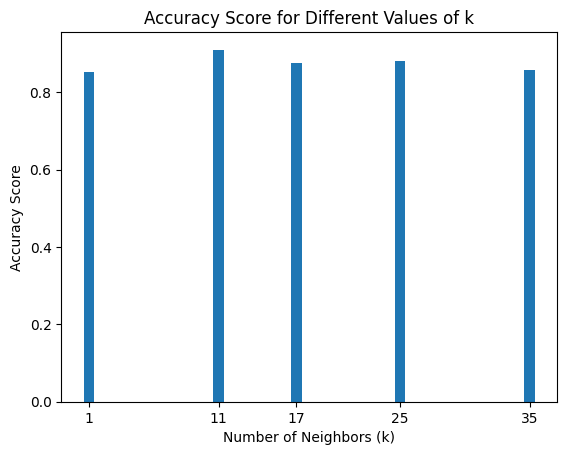

In [ ]:
### START CODE HERE ###

k = [1,11,17,25,35]

knn_score = []
y_pred_li = []
for i in k:
  knn_model = KNeighborsClassifier(n_neighbors = i)
  knn_model.fit(X_train,Y_train)


  y_pred_knn = knn_model.predict(X_test)
  y_pred_li.append(y_pred_knn)
  accuracy = accuracy_score(Y_test, y_pred_knn)
  knn_score.append(accuracy)

best_model_index = knn_score.index(max(knn_score))

conf_matrix = confusion_matrix(Y_test, y_pred_li[best_model_index])

print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred_li[best_model_index]))
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_li[best_model_index]))


plt.bar(k, knn_score)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for Different Values of k')
plt.xticks(k)
plt.show()

### END CODE HERE ###

### **Decision Tree Model Training and Testing**
Parameters
- criterion = `['entropy', 'gini']`
- max_depth = `[4,5,6,None]`

Fit models with all this parameters.<br>
Then, print accuracy score of all parameter sets.<br>
Next, <font color="orange">plot the Tree, print confusion matrix and classification report</font> of best accuracy score for each criteion `entropy` and `gini`.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `DecisionTreeClassifier()`

</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

```
Accuracy is 0.8471760797342193 for criterion = entropy and max_depth = 4
...
Accuracy is 0.8504983388704319 for criterion = entropy and max_depth = None
Accuracy is 0.8504983388704319 for criterion = gini and max_depth = 4
...
Accuracy is 0.8338870431893688 for criterion = gini and max_depth = None
```

![image.png](attachment:image.png)

```Entropy Confusion Matrix:
 [[205  17   2]
 [ 10  30   6]
 [  1   5  25]]
Entropy Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.92      0.93       224
           2       0.58      0.65      0.61        46
           3       0.76      0.81      0.78        31

    accuracy                           0.86       301
   macro avg       0.76      0.79      0.78       301
weighted avg       0.87      0.86      0.87       301

Gini Confusion Matrix:
 [[212  11   1]
 [ 18  27   1]
 [  2  12  17]]
Gini Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.95      0.93       224
           2       0.54      0.59      0.56        46
           3       0.89      0.55      0.68        31

    accuracy                           0.85       301
   macro avg       0.78      0.69      0.72       301
weighted avg       0.85      0.85      0.85       301
```
</details>

In [ ]:
### START CODE HERE ###


criterion = ['entropy', 'gini']
max_depth = [4,5,6]
best_criterion_model=[]
dt_score = []
d_tree = DecisionTreeClassifier()
best_accuracy = 0
best_model = None
for criteria in criterion:
    for max_depths in max_depth:
        dt = DecisionTreeClassifier(criterion=criteria, max_depth=max_depths)
        dt.fit(X_train, Y_train)
        y_pred_dt = dt.predict(X_test)
        accuracy = accuracy_score(Y_test, y_pred_dt)
        print(f"Accuracy Score for criterion={criteria}, max_depth={max_depths}: {accuracy}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = dt

    best_criterion_model.append(best_model)
    dt_score.append(accuracy)
    best_accuracy = 0
    best_model = None


print("Confusion Matrix entropy:")
print(confusion_matrix(Y_test, best_criterion_model[0].predict(X_test)))
print("\nClassification Report entropy:")
print(classification_report(Y_test,  best_criterion_model[0].predict(X_test)))
print("------------------------------------------------")
print("Confusion Matrix gini:")
print(confusion_matrix(Y_test,  best_criterion_model[1].predict(X_test)))
print("\nClassification Report gini:")
print(classification_report(Y_test, best_criterion_model[1].predict(X_test)))
### END CODE HERE ###


Accuracy Score for criterion=entropy, max_depth=4: 0.8106312292358804
Accuracy Score for criterion=entropy, max_depth=5: 0.8305647840531561
Accuracy Score for criterion=entropy, max_depth=6: 0.8073089700996677
Accuracy Score for criterion=gini, max_depth=4: 0.8803986710963455
Accuracy Score for criterion=gini, max_depth=5: 0.8770764119601329
Accuracy Score for criterion=gini, max_depth=6: 0.8737541528239202
Confusion Matrix entropy:
[[199  27   2]
 [  6  34   3]
 [  0  13  17]]

Classification Report entropy:
              precision    recall  f1-score   support

           1       0.97      0.87      0.92       228
           2       0.46      0.79      0.58        43
           3       0.77      0.57      0.65        30

    accuracy                           0.83       301
   macro avg       0.73      0.74      0.72       301
weighted avg       0.88      0.83      0.84       301

------------------------------------------------
Confusion Matrix gini:
[[213  13   2]
 [  9  32   2]
 [

In [ ]:
print(dt_score)

[0.8073089700996677, 0.8737541528239202]


[Text(0.4732142857142857, 0.9166666666666666, 'x[4] <= 0.369\nentropy = 1.086\nsamples = 702\nvalue = [518, 109, 75]'),
 Text(0.17261904761904762, 0.75, 'x[1] <= 0.464\nentropy = 0.259\nsamples = 457\nvalue = [437, 20, 0]'),
 Text(0.047619047619047616, 0.5833333333333334, 'x[9] <= 0.5\nentropy = 0.063\nsamples = 406\nvalue = [403, 3, 0]'),
 Text(0.023809523809523808, 0.4166666666666667, 'entropy = 0.0\nsamples = 366\nvalue = [366, 0, 0]'),
 Text(0.07142857142857142, 0.4166666666666667, 'x[0] <= 0.191\nentropy = 0.384\nsamples = 40\nvalue = [37, 3, 0]'),
 Text(0.047619047619047616, 0.25, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.09523809523809523, 0.25, 'x[6] <= -1.035\nentropy = 0.971\nsamples = 5\nvalue = [2, 3, 0]'),
 Text(0.07142857142857142, 0.08333333333333333, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.11904761904761904, 0.08333333333333333, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.2976190476190476, 0.5833333333333334, 'x[0] <= 0.

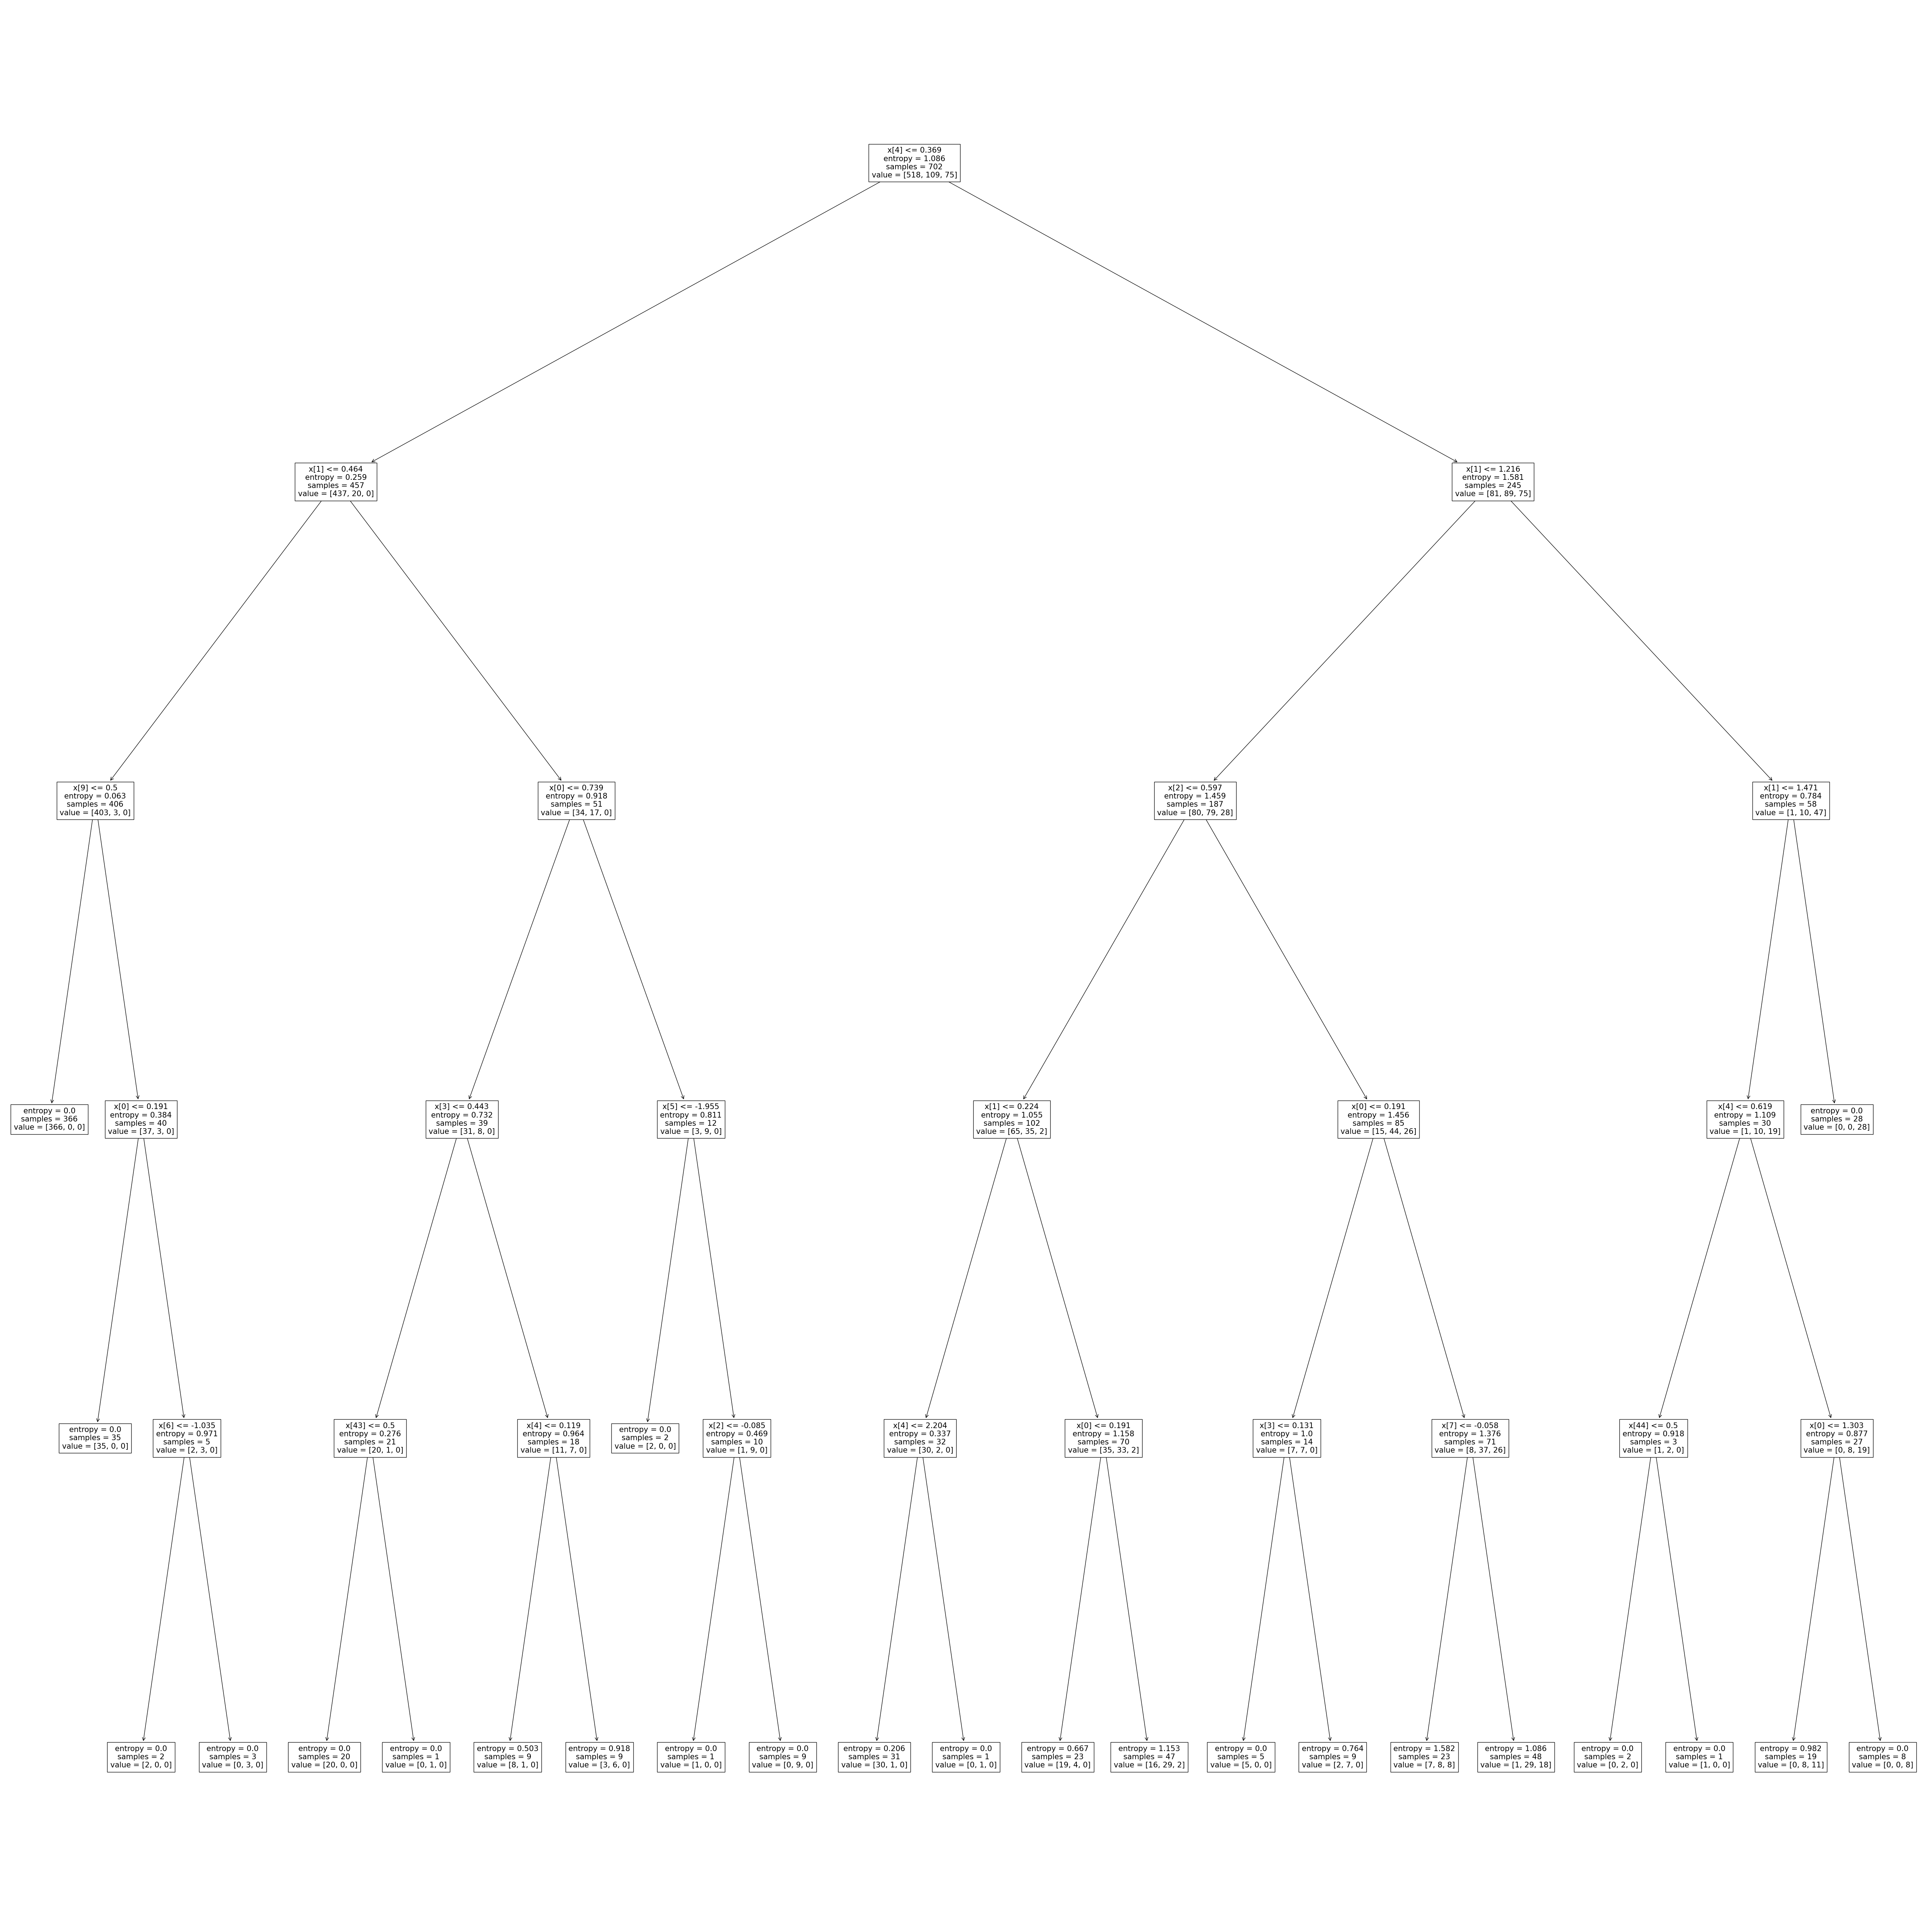

In [ ]:
plt.figure(figsize=(70, 70))
tree.plot_tree(best_criterion_model[0])

[Text(0.45535714285714285, 0.9, 'x[1] <= 0.464\ngini = 0.42\nsamples = 702\nvalue = [518, 109, 75]'),
 Text(0.19642857142857142, 0.7, 'x[4] <= 0.369\ngini = 0.116\nsamples = 487\nvalue = [457, 28, 2]'),
 Text(0.10714285714285714, 0.5, 'x[3] <= 2.13\ngini = 0.015\nsamples = 406\nvalue = [403, 3, 0]'),
 Text(0.07142857142857142, 0.3, 'x[9] <= 0.5\ngini = 0.01\nsamples = 405\nvalue = [403, 2, 0]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.0\nsamples = 366\nvalue = [366, 0, 0]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.097\nsamples = 39\nvalue = [37, 2, 0]'),
 Text(0.14285714285714285, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.2857142857142857, 0.5, 'x[3] <= 0.131\ngini = 0.46\nsamples = 81\nvalue = [54, 25, 2]'),
 Text(0.21428571428571427, 0.3, 'x[0] <= 2.266\ngini = 0.123\nsamples = 31\nvalue = [29, 1, 1]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.064\nsamples = 30\nvalue = [29, 1, 0]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.357142

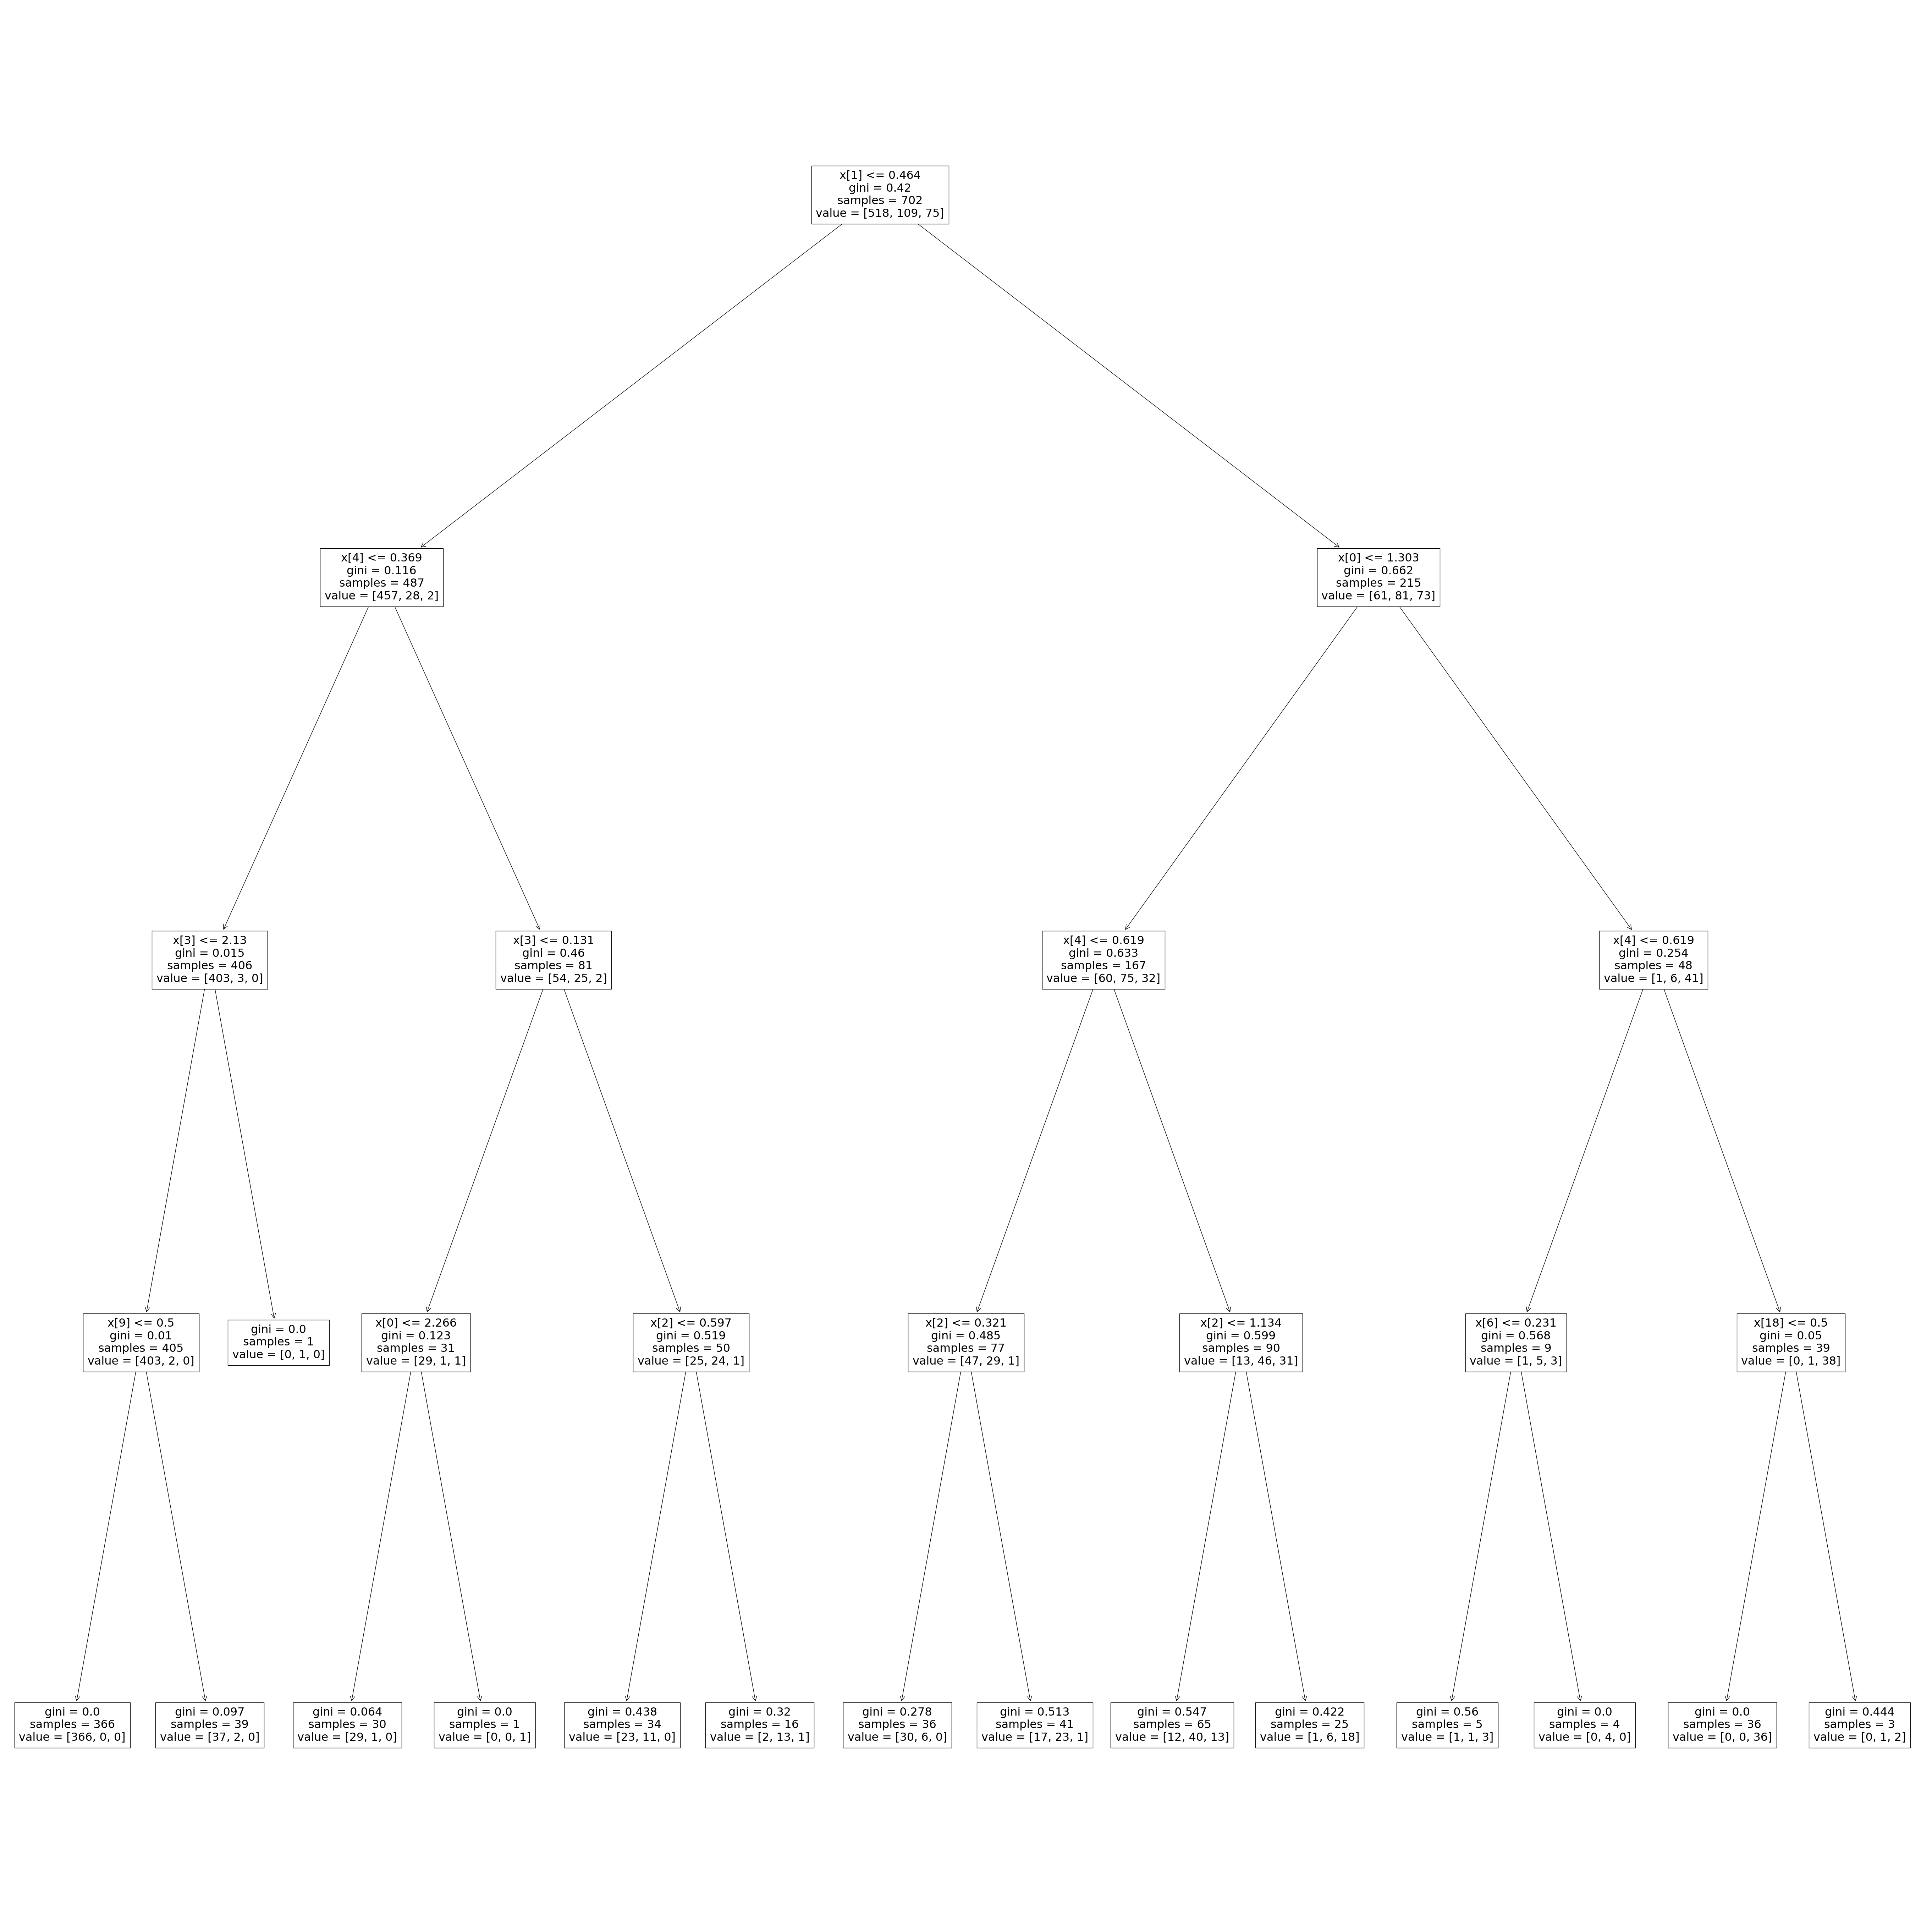

In [ ]:
plt.figure(figsize=(70, 70))
tree.plot_tree(best_criterion_model[1])

### **Random Forest Model Training and Testing**
Parameters
- criterion = `['entropy', 'gini']`
- n_estimators = `[10,100]`

Fit models with all this parameters.<br>
Then, print accuracy score of all parameter sets.<br>
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `RandomForestClassifier()`

</details>
<br>

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
```
Accuracy is 0.8803986710963455 for criterion = entropy and n_estimators = 10
...
```

</details>

In [ ]:
### START CODE HERE ###
criterion = ['entropy', 'gini']
n_estimators = [10,100]
best_rand_model = []
rand_score = []
all_rand_model = []

for criteria in criterion:
    for n_estimator in n_estimators:
        rand_class = RandomForestClassifier(criterion=criteria, n_estimators=n_estimator,max_depth=None)
        rand_class.fit(X_train, Y_train)
        all_rand_model.append(rand_class)
        y_pred_rand = rand_class.predict(X_test)
        accuracy = accuracy_score(Y_test, y_pred_rand)
        print(f"Accuracy Score for criterion={criteria}, n_estimators={n_estimator}: {accuracy}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model_rand = rand_class

    best_rand_model.append(best_model_rand)
    rand_score.append(accuracy)
    best_accuracy = 0
    best_model_rand = None

### END CODE HERE ###
### END CODE HERE ###

<ipython-input-24-464b64575416>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_class.fit(X_train, Y_train)
<ipython-input-24-464b64575416>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_class.fit(X_train, Y_train)


Accuracy Score for criterion=entropy, n_estimators=10: 0.8870431893687708
Accuracy Score for criterion=entropy, n_estimators=100: 0.8903654485049833
Accuracy Score for criterion=gini, n_estimators=10: 0.8803986710963455


<ipython-input-24-464b64575416>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_class.fit(X_train, Y_train)
<ipython-input-24-464b64575416>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_class.fit(X_train, Y_train)


Accuracy Score for criterion=gini, n_estimators=100: 0.9003322259136213


**Print confusion matrix and classification report of best accuracy score.**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
```
confusion_matrix :
 [[219   4   1]
 [ 13  31   2]
 [  0  10  21]]
classification_report :
               precision    recall  f1-score   support

           1       0.94      0.98      0.96       224
           2       0.69      0.67      0.68        46
           3       0.88      0.68      0.76        31

    accuracy                           0.90       301
   macro avg       0.84      0.78      0.80       301
weighted avg       0.90      0.90      0.90       301
```

</details>

In [ ]:
all_rand_model

[RandomForestClassifier(criterion='entropy', n_estimators=10),
 RandomForestClassifier(criterion='entropy'),
 RandomForestClassifier(n_estimators=10),
 RandomForestClassifier()]

In [ ]:
print(rand_score)

[0.8903654485049833, 0.9003322259136213]


In [ ]:
### START CODE HERE ###

print("Confusion Matrix entropy:")
print(confusion_matrix(Y_test, best_rand_model[0].predict(X_test)))
print("\nClassification Report entropy:")
print(classification_report(Y_test,  best_rand_model[0].predict(X_test)))
print("------------------------------------------------")
print("Confusion Matrix gini:")
print(confusion_matrix(Y_test,  best_rand_model[1].predict(X_test)))
print("\nClassification Report gini:")
print(classification_report(Y_test, best_rand_model[1].predict(X_test)))


### END CODE HERE ###

Confusion Matrix entropy:
[[220   6   2]
 [ 14  27   2]
 [  0   9  21]]

Classification Report entropy:
              precision    recall  f1-score   support

           1       0.94      0.96      0.95       228
           2       0.64      0.63      0.64        43
           3       0.84      0.70      0.76        30

    accuracy                           0.89       301
   macro avg       0.81      0.76      0.78       301
weighted avg       0.89      0.89      0.89       301

------------------------------------------------
Confusion Matrix gini:
[[220   7   1]
 [ 12  30   1]
 [  1   8  21]]

Classification Report gini:
              precision    recall  f1-score   support

           1       0.94      0.96      0.95       228
           2       0.67      0.70      0.68        43
           3       0.91      0.70      0.79        30

    accuracy                           0.90       301
   macro avg       0.84      0.79      0.81       301
weighted avg       0.90      0.90      0.9

**Plot bar graph of feature_importance of best models.**
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.feature_importances_`

</details>
<br>

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

![image.png](attachment:image.png)


</details>

In [ ]:
overall_best_score = []
overall_best_score.extend(dt_score)
overall_best_score.extend(rand_score)
max_score_index = overall_best_score.index(max(overall_best_score))


In [ ]:
overall_best_md = []
overall_best_md.extend(best_criterion_model)
overall_best_md.extend(best_rand_model)
best_model_param = overall_best_md[max_score_index]

In [ ]:
# best_criterion_model.extend(best_rand_model)

In [ ]:
best_criterion_model

[DecisionTreeClassifier(criterion='entropy', max_depth=5),
 DecisionTreeClassifier(max_depth=4)]

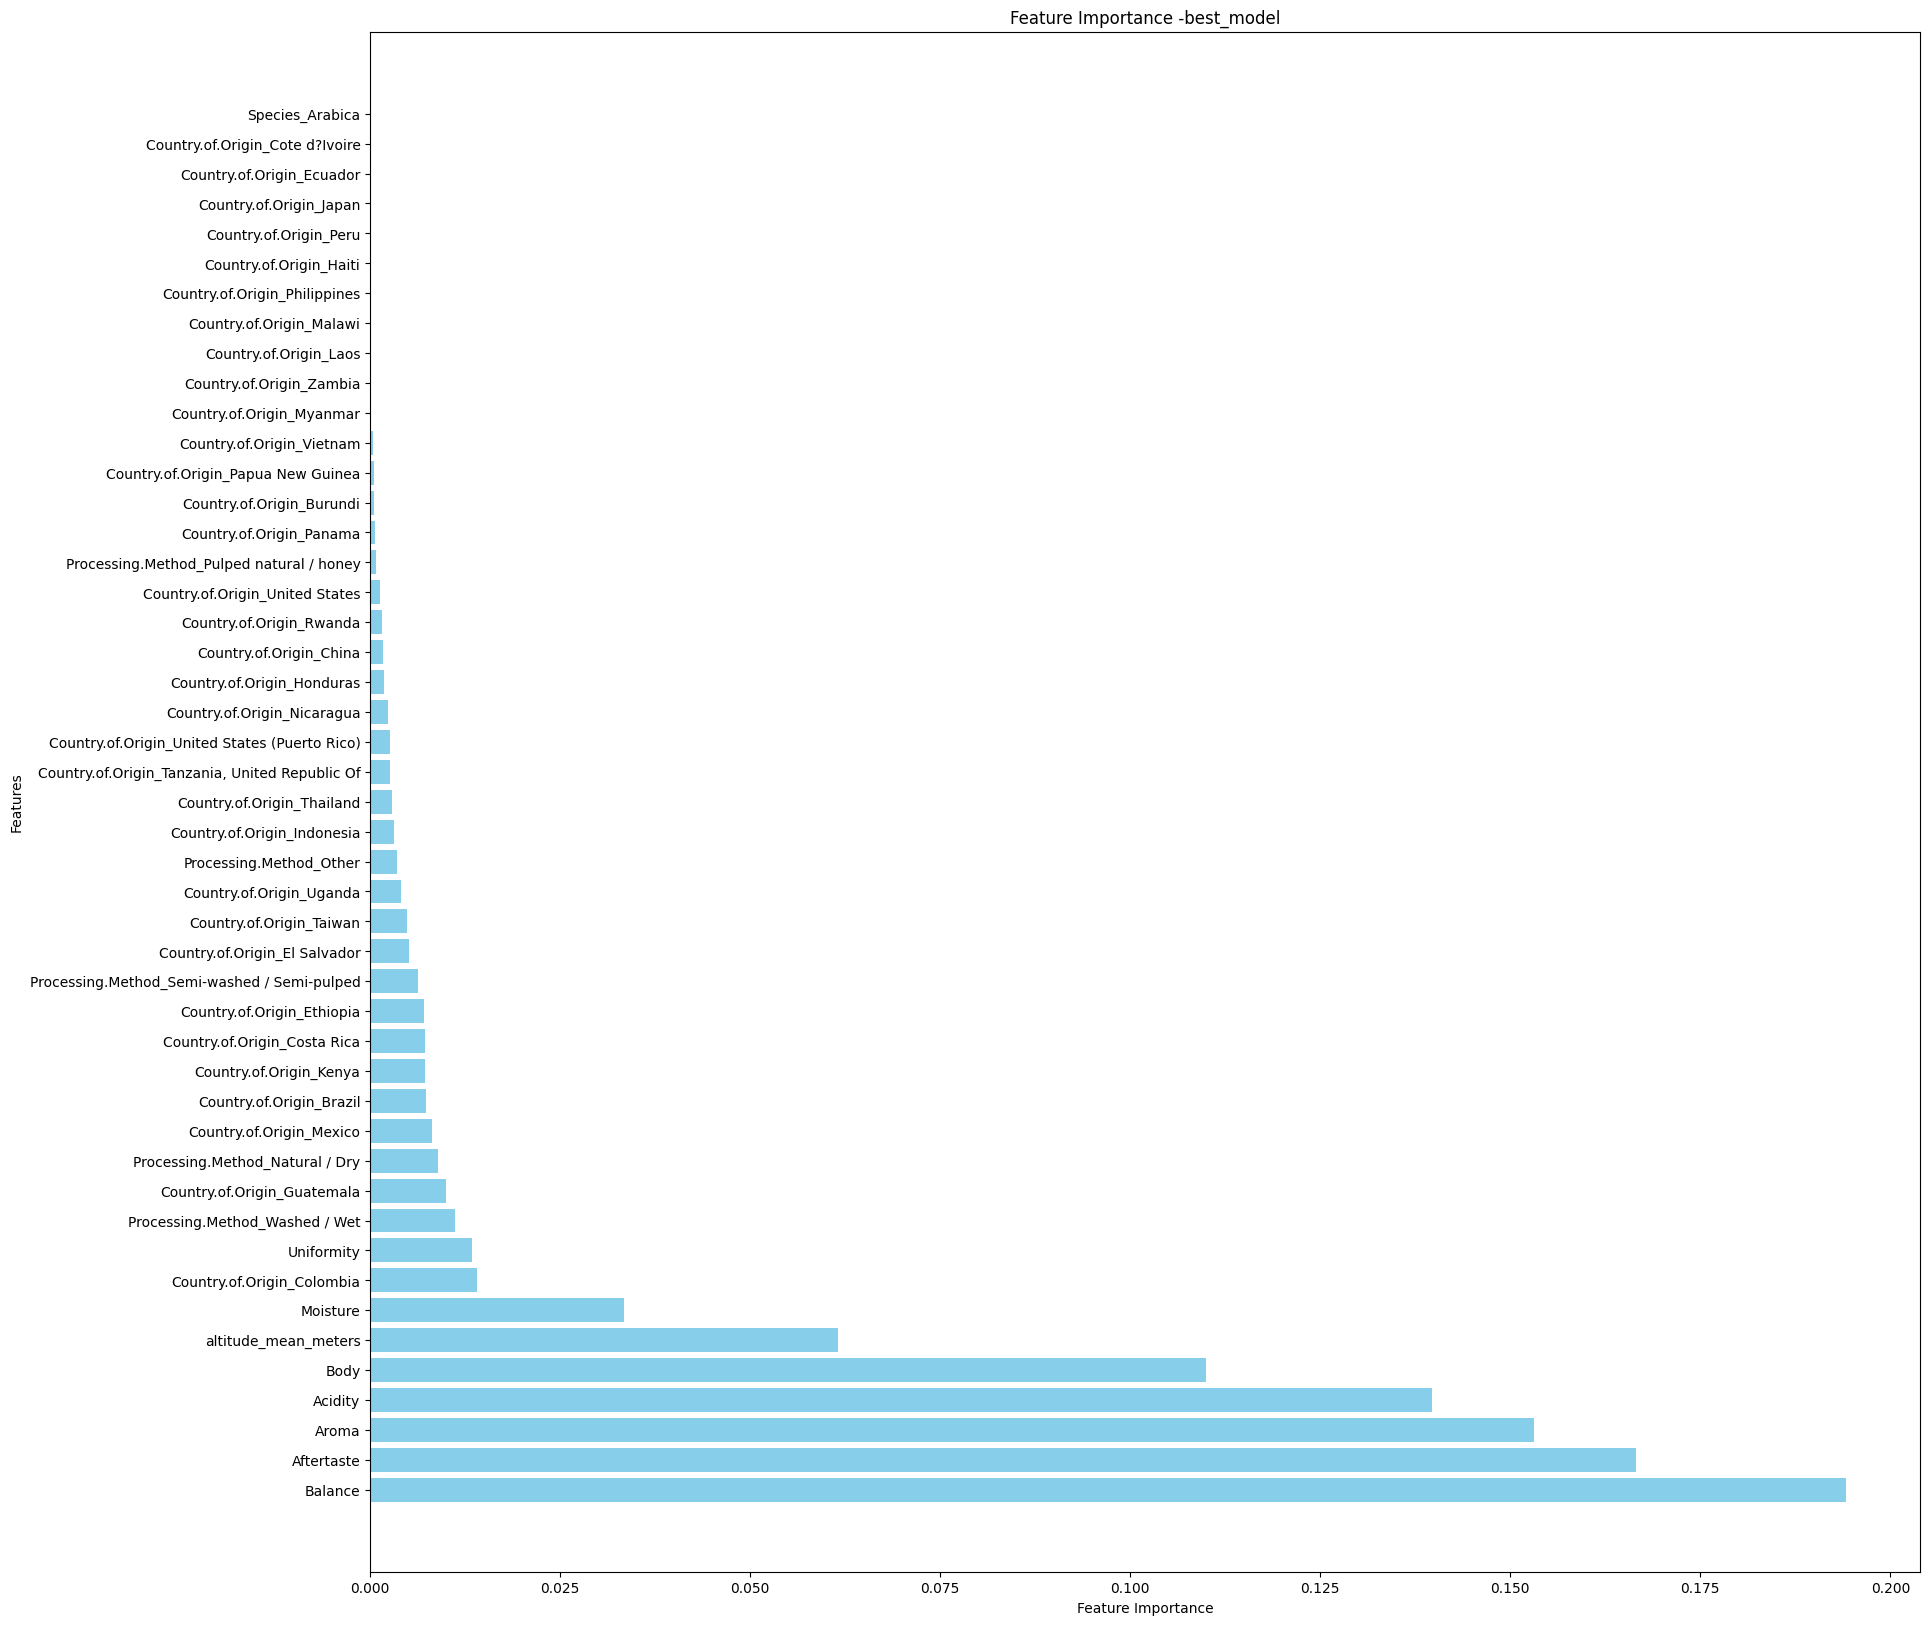

[1.53117085e-01 1.66558419e-01 1.39758975e-01 1.10016544e-01
 1.94209246e-01 1.34471198e-02 3.34551265e-02 6.15422681e-02
 0.00000000e+00 7.38913782e-03 4.71573113e-04 1.63233559e-03
 1.40466424e-02 7.22463767e-03 0.00000000e+00 0.00000000e+00
 5.16331475e-03 7.12084511e-03 9.93376680e-03 1.04997101e-07
 1.79875081e-03 3.11651242e-03 0.00000000e+00 7.23388670e-03
 1.72639997e-05 1.10012670e-05 8.14079152e-03 1.50511047e-04
 2.37121464e-03 6.35154038e-04 4.53514377e-04 0.00000000e+00
 6.60937163e-07 1.50672162e-03 4.81711014e-03 2.63619137e-03
 2.82224054e-03 4.04320222e-03 1.36122363e-03 2.55219407e-03
 4.04395293e-04 1.36263273e-04 8.96559411e-03 3.51367645e-03
 7.81544267e-04 6.31917388e-03 1.11240657e-02]


In [ ]:
### START CODE HERE ###

feature_importances =best_model_param.feature_importances_
# feature_importances = sorted(feature_importances)

feature_names = X.columns

# Step 5: Combine feature names and importance scores into tuples
features_importance_pairs = list(zip(feature_names, feature_importances))

# Step 6: Sort the tuples based on importance scores
sorted_features_importance_pairs = sorted(features_importance_pairs, key=lambda x: x[1])

sorted_feature_names = [pair[0] for pair in sorted_features_importance_pairs]
sorted_feature_importance = [pair[1] for pair in sorted_features_importance_pairs]

plt.figure(figsize=(20, 20))
plt.barh(sorted_feature_names, sorted_feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance -best_model')
plt.gca().invert_yaxis()  # Invert y-axis to display feature names from top to bottom
plt.show()
print(feature_importances)

### END CODE HERE ###

**Plot tree of all forest**<br>
NOTE: Please use high DPI for easier observation of the forest.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

![image.png](attachment:image.png)


</details>

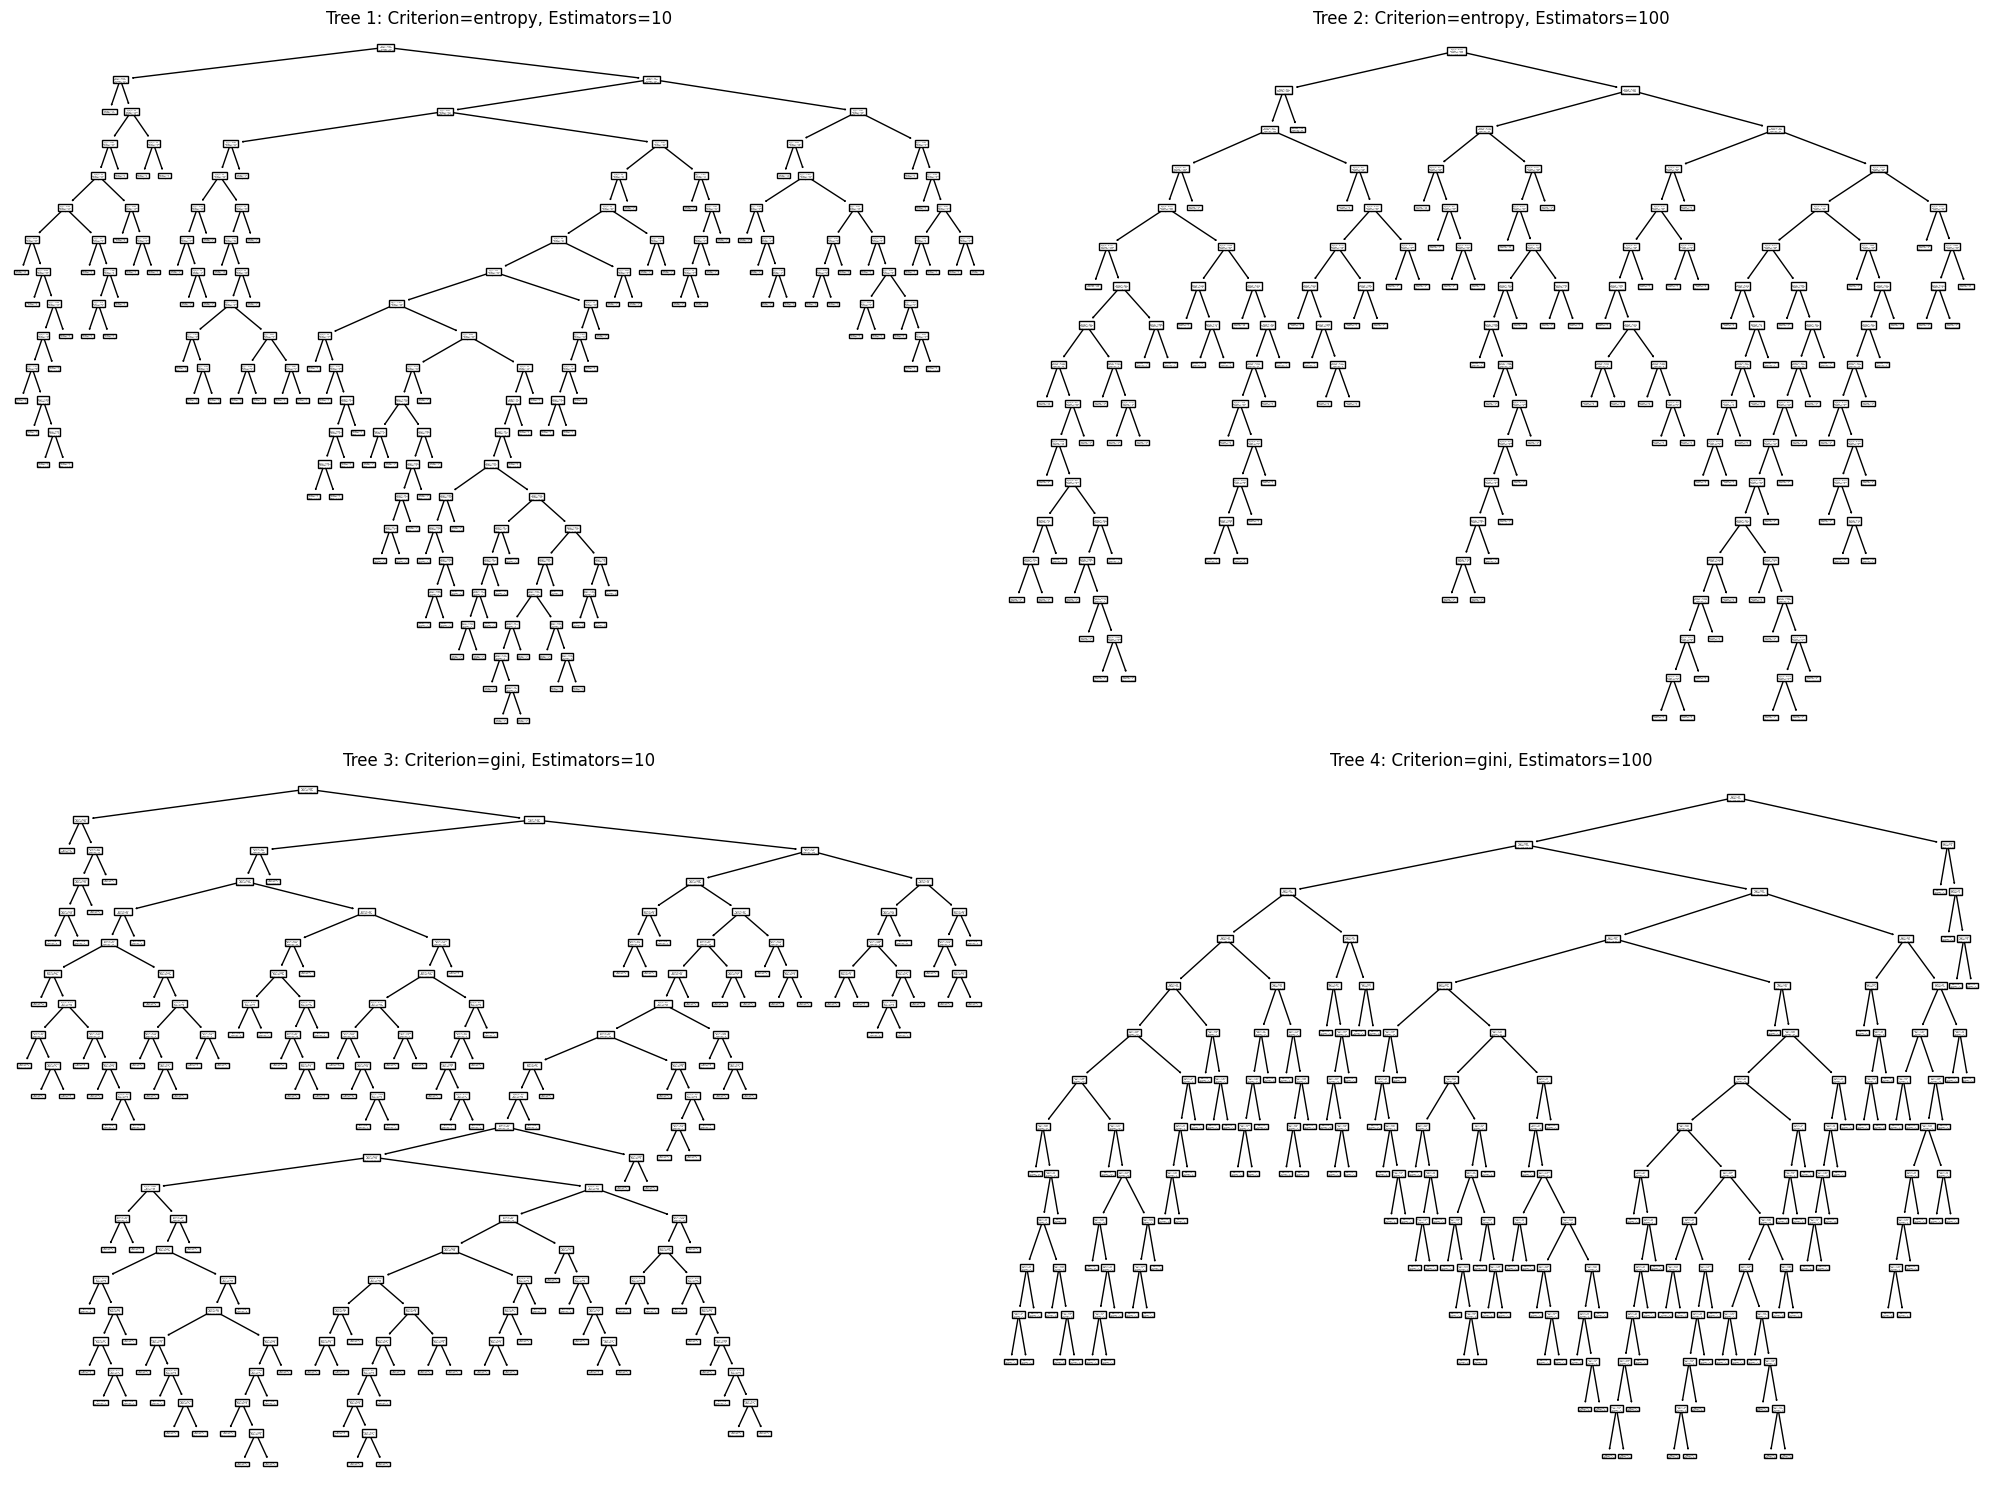

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

for i, rand_model in enumerate(all_rand_model):
    # Determine the position of the subplot
    row = i // 2
    col = i % 2

    # Plotting the first tree of each RandomForestClassifier
    tree.plot_tree(rand_model.estimators_[0], ax=axs[row, col])
    axs[row, col].set_title(f"Tree {i+1}: Criterion={rand_model.criterion}, Estimators={rand_model.n_estimators}")

plt.tight_layout()
plt.show()

### **MLP Training and Testing**
Parameters
 - hidden_layer_sizes = `(10,10,)`

Fit models with this parameters.<br>
Then, print accuracy score, confusion matrix and classification report.<br>
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `MLPClassifier()`

</details>
<br>

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
```
Accuracy is 0.9036544850498339
Confusion Matrix:
 [[211  13   0]
 [  6  37   3]
 [  0   7  24]]
Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.94      0.96       224
           2       0.65      0.80      0.72        46
           3       0.89      0.77      0.83        31

    accuracy                           0.90       301
   macro avg       0.84      0.84      0.83       301
weighted avg       0.91      0.90      0.91       301
...
```
</details>

In [ ]:
### START CODE HERE ###

hidden_layer_sizes = (10,10,)
mlp = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes)
mlp.fit(X_train,Y_train)


y_pred_mlp = mlp.predict(X_test)

# Calculate accuracy

print("Confusion Matrix entropy:")
print(confusion_matrix(Y_test, y_pred_mlp))
print("\nClassification Report entropy:")
print(classification_report(Y_test, y_pred_mlp))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix entropy:
[[215  12   1]
 [  5  36   2]
 [  0   8  22]]

Classification Report entropy:
              precision    recall  f1-score   support

           1       0.98      0.94      0.96       228
           2       0.64      0.84      0.73        43
           3       0.88      0.73      0.80        30

    accuracy                           0.91       301
   macro avg       0.83      0.84      0.83       301
weighted avg       0.92      0.91      0.91       301



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### **Hyperparameter Tuning (GridsearchCV)**
Search space for KNN
- n_neighhbors = `[1,3,5,7,9,11,13,15,17,19,25,35,45]`

Search space for Decision Tree
- criterion = `['entropy', 'gini']`
- max_depth = `[4,5,6]`
- max_features = `['sqrt', 'log2',None]`
- min_samples_leaf = `[1,2,4]`

Search space for Random forest
- criterion = `['entropy', 'gini']`
- max_depth = `[4,5,6]`
- max_features = `['sqrt', 'log2',None]`
- min_samples_leaf = `[1,2,4]`
- n_estimators = `[10,30,50,100]`

Search space for MLP
- hidden_layer_sizes = `[(2,2,), (20,20,), (50,50,)]`
- n_iter = `[100,200,300]`

Then run grid search.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `GridSearchCV()`

</details>
<br>


In [ ]:
# Define parameter grids for each model

knn_param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,19,25,35,45]}
dt_param_grid = {'criterion': ['entropy', 'gini'],
                 'max_depth': [4,5,6],
                 'max_features': ['sqrt', 'log2', None],
                 'min_samples_leaf': [1,2,4]}
rand_param_grid = {'criterion': ['entropy', 'gini'],
                   'max_depth': [4,5,6],
                   'max_features': ['sqrt', 'log2', None],
                   'min_samples_leaf': [1,2,4],
                   'n_estimators': [10,30,50,100]}
mlp_param_grid = {'hidden_layer_sizes': [(2,2,), (20,20,), (50,50,)],
                  'max_iter': [100,200,300]}

# Initialize models
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rand = RandomForestClassifier()
mlp = MLPClassifier()

# Initialize grid search for each model
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5)
dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=5)
rand_grid_search = GridSearchCV(rand, rand_param_grid, cv=5)
mlp_grid_search = GridSearchCV(mlp, mlp_param_grid, cv=5)

# Fit the grid search objects
knn_grid_search.fit(X_train, Y_train)
dt_grid_search.fit(X_train, Y_train)
rand_grid_search.fit(X_train, Y_train)
mlp_grid_search.fit(X_train, Y_train)

# Print the results
print("KNN - Best parameters:", knn_grid_search.best_params_)
print("KNN - Best score:", knn_grid_search.best_score_)
print()
print("Decision Tree - Best parameters:", dt_grid_search.best_params_)
print("Decision Tree - Best score:", dt_grid_search.best_score_)
print()
print("Random Forest - Best parameters:", rand_grid_search.best_params_)
print("Random Forest - Best score:", rand_grid_search.best_score_)
print()
print("MLP - Best parameters:", mlp_grid_search.best_params_)
print("MLP - Best score:", mlp_grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

KNN - Best parameters: {'n_neighbors': 15}
KNN - Best score: 0.8631914893617022

Decision Tree - Best parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 2}
Decision Tree - Best score: 0.8560992907801419

Random Forest - Best parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 2, 'n_estimators': 10}
Random Forest - Best score: 0.8845997973657548

MLP - Best parameters: {'hidden_layer_sizes': (20, 20), 'max_iter': 100}
MLP - Best score: 0.904549138804458


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


**Print the result of grid search.**<br>
- Best parameters of each models
- Best scores of each models
- Mean score
- std scored
- Parameters<br>

**Plot bar graph to show accuracy score of each models.**


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
```
Best parameters: {'n_neighbors': 9}
Best score: 0.8803444782168187
Mean cross-validated score: [0.85893617 0.85036474 0.86322188 0.87893617 0.88034448 0.87463019
 0.86751773 0.86753799 0.86895643 0.86755826 0.85758865 0.86754813
 0.86471125]
Standard deviation of cross-validated score: [0.02615339 0.02804864 0.00870862 0.01734425 0.01932745 0.01472621
 0.00729099 0.00693851 0.00838998 0.01430598 0.01142008 0.01030234
 0.01525526]
Parameters: [{'n_neighbors': 1}, {'n_neighbors': 3}, {'n_neighbors': 5}, {'n_neighbors': 7}, {'n_neighbors': 9}, {'n_neighbors': 11}, {'n_neighbors': 13}, {'n_neighbors': 15}, {'n_neighbors': 17}, {'n_neighbors': 19}, {'n_neighbors': 25}, {'n_neighbors': 35}, {'n_neighbors': 45}]
...
```

![image.png](attachment:image.png)
</details>

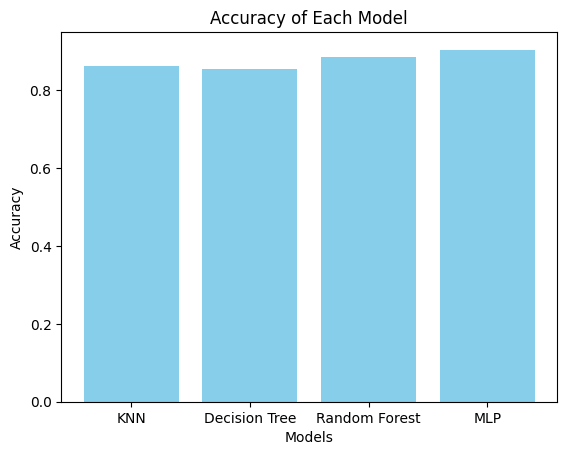

In [ ]:

# Extracting best scores of each model
knn_best_score = knn_grid_search.best_score_
dt_best_score = dt_grid_search.best_score_
rand_best_score = rand_grid_search.best_score_
mlp_best_score = mlp_grid_search.best_score_

# List of models
models = ['KNN', 'Decision Tree', 'Random Forest', 'MLP']

# List of best scores
best_scores = [knn_best_score, dt_best_score, rand_best_score, mlp_best_score]

# Plotting bar graph
plt.bar(models, best_scores, color='skyblue')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Model')

# Display the plot
plt.show()


**Plot the confusion matrix for each model's best parameters.**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

![image.png](attachment:image.png)


</details>

In [ ]:
!pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 25.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


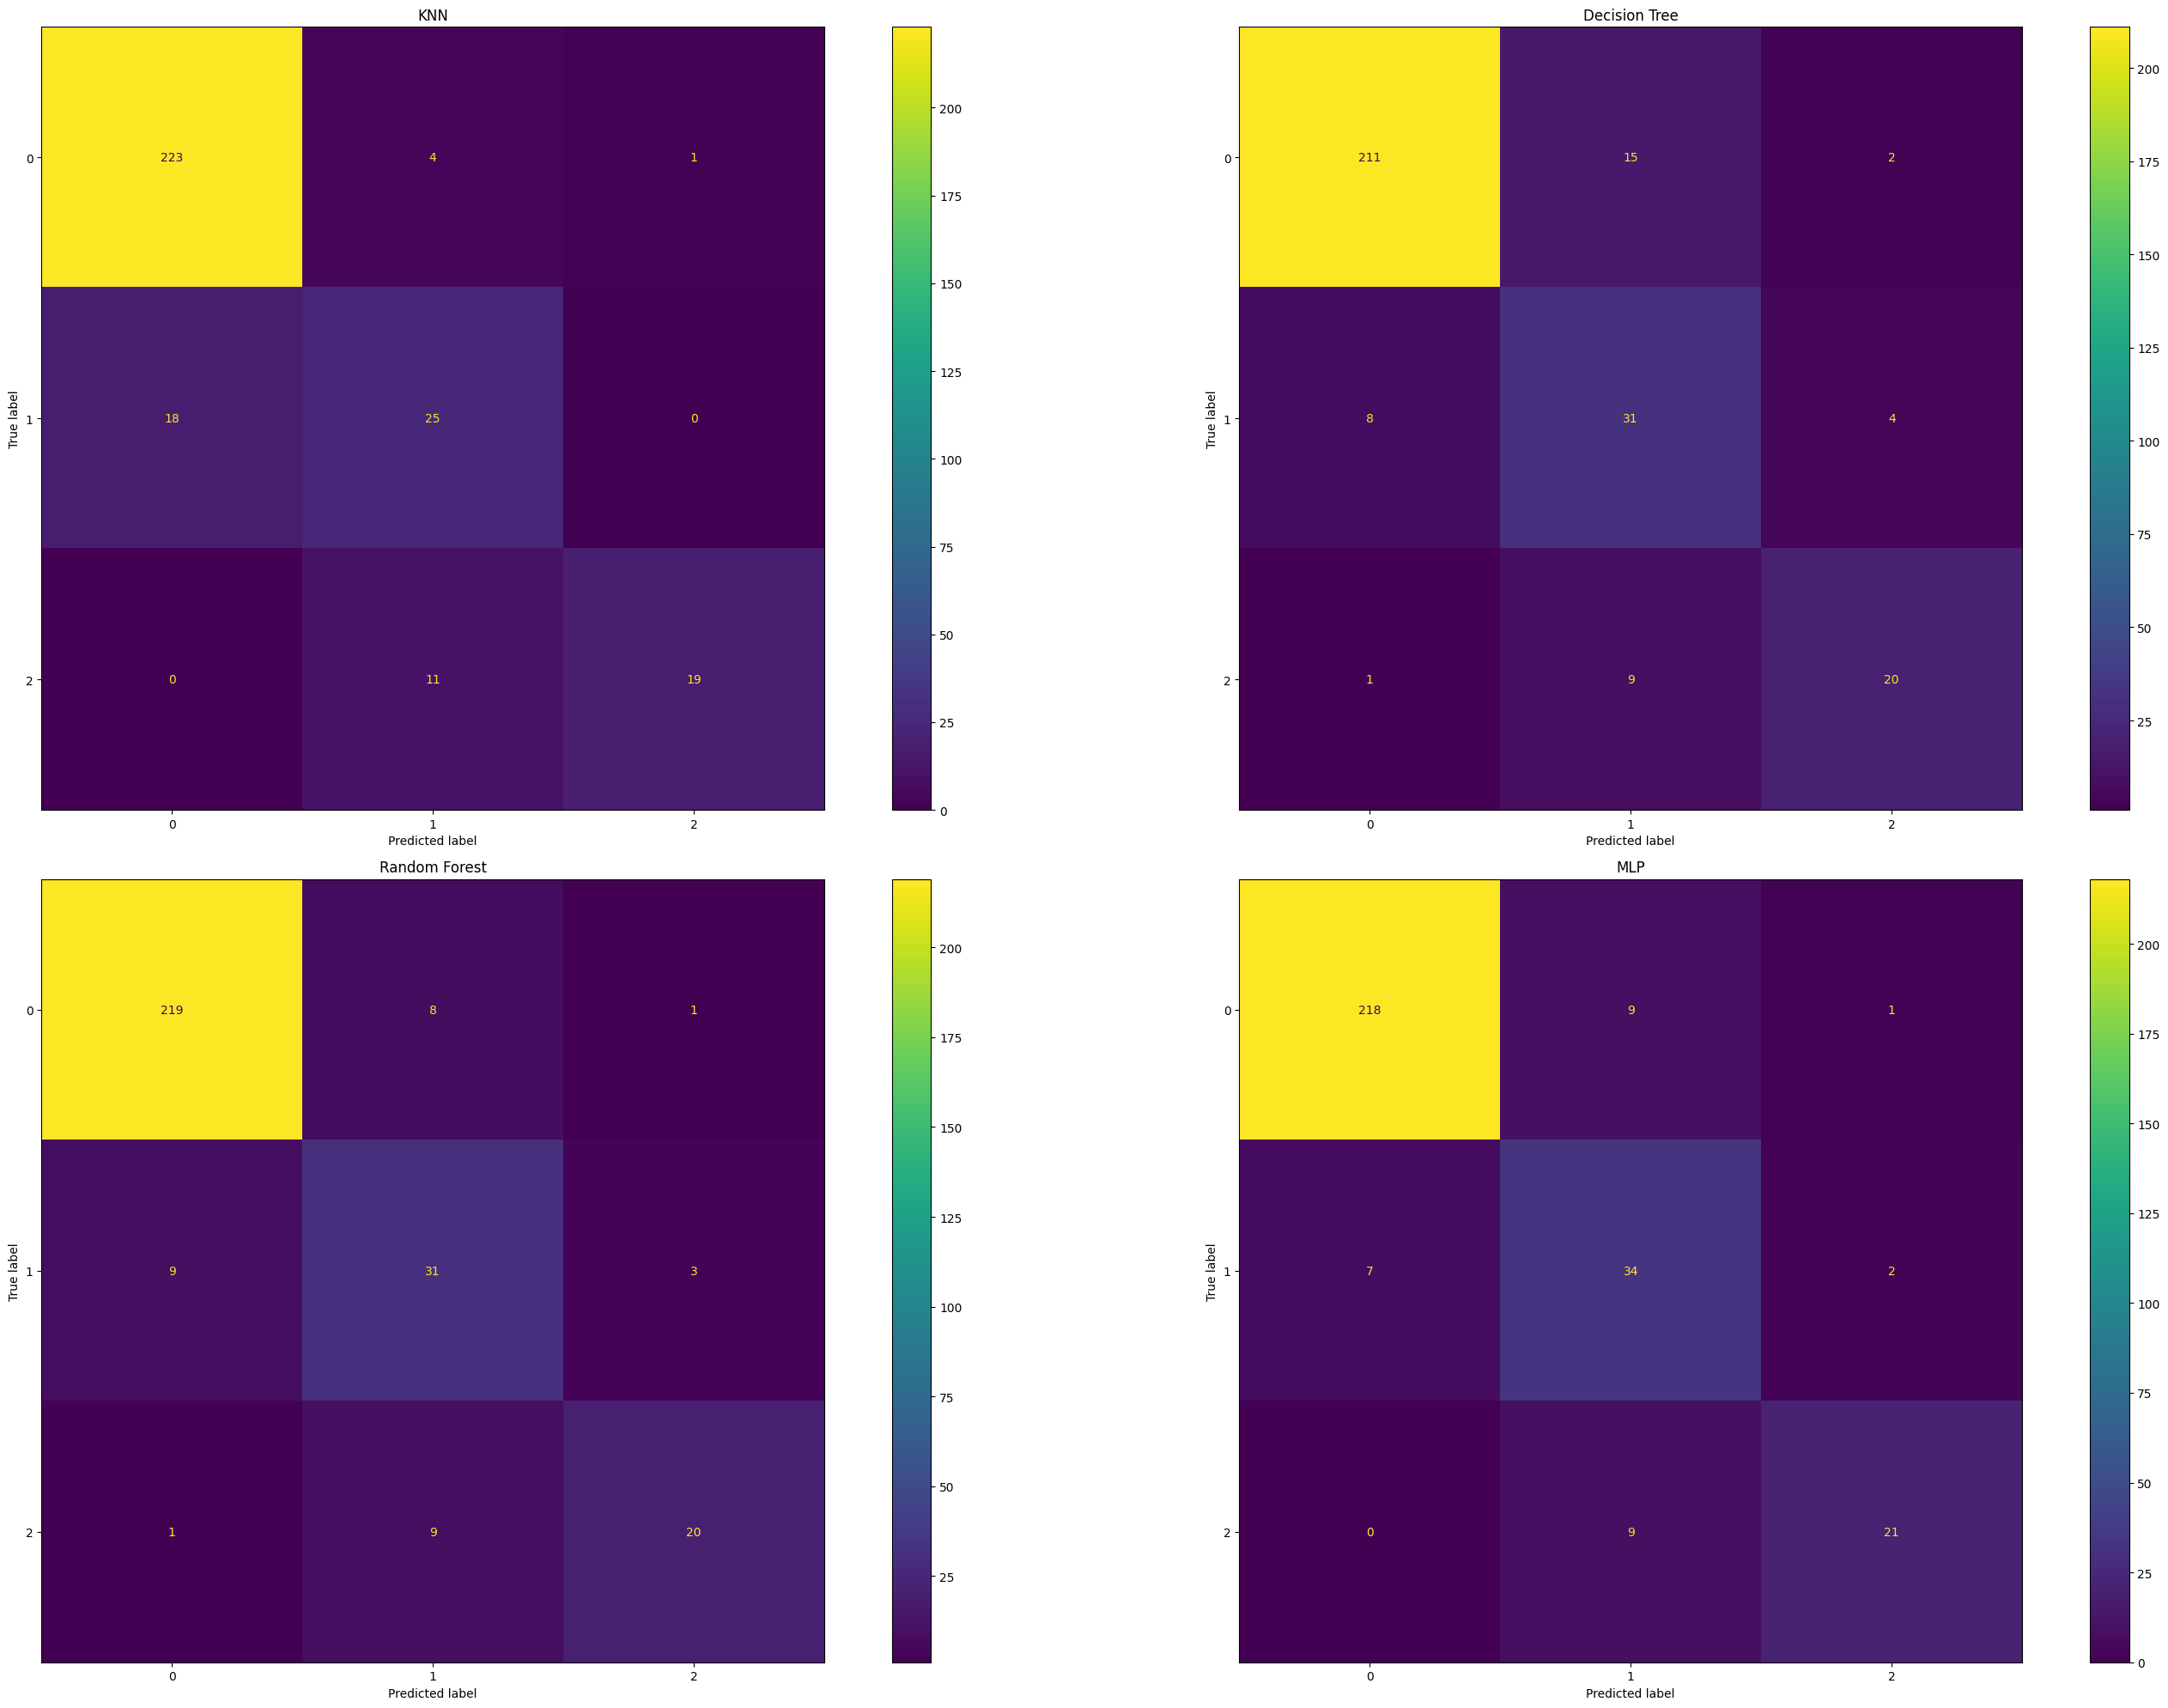

In [ ]:
  ### START CODE HERE ###
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_knn = knn_grid_search.best_estimator_.predict(X_test)
y_pred_dt = dt_grid_search.best_estimator_.predict(X_test)
y_pred_rand = rand_grid_search.best_estimator_.predict(X_test)
y_pred_mlp = mlp_grid_search.best_estimator_.predict(X_test)

  # Plot confusion matrix for KNN
cm_knn = confusion_matrix(Y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)

cm_dt = confusion_matrix(Y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)

cm_rand = confusion_matrix(Y_test, y_pred_rand)
disp_rand = ConfusionMatrixDisplay(confusion_matrix=cm_rand)

cm_mlp = confusion_matrix(Y_test, y_pred_mlp)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp)


# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(30, 20))

# Plot confusion matrices
disp_knn.plot(ax=axs[0, 0])
axs[0, 0].set_title('KNN')

disp_dt.plot(ax=axs[0, 1])
axs[0, 1].set_title('Decision Tree')

disp_rand.plot(ax=axs[1, 0])
axs[1, 0].set_title('Random Forest')

disp_mlp.plot(ax=axs[1, 1])
axs[1, 1].set_title('MLP')

plt.tight_layout()
plt.show()




  ### END CODE HERE ###